In [692]:
%pylab inline
import os
import seaborn 
import matplotlib.pyplot as plt
import natto
import IPython
import numpy
from pyspark.sql import SQLContext, Row
from pyspark.sql.types import * 
from collections import namedtuple
pylab.rcParams['figure.figsize'] = (10.0, 8.0)


Populating the interactive namespace from numpy and matplotlib


In [693]:
preped_data= sc.textFile("/user/root/analytic_out/part-r-00000")
hdrdata = ['idtabbYEAR',  'NETWORK', 'LABOREXP', 'STAFF', 'ELECEXP', 'KWH', 'TOTCOST', 'CAPITAL',  'LABOR',  'ELEC']
schema   = namedtuple('Flight', hdrdata)

In [694]:
def parse(row):

    return schema(*row[:11])


In [695]:
def mapperCAPITAL(value):
    result_list = []
   
    result_list.append(value['CAPITAL'] )
    return result_list

In [696]:
def mapper(value):
    result_list = []
   
    result_list.append(value)
    return result_list

[u'1\t90|13107|1061|16|163|1631|2536|41.83754|6.427445|51.73502']


defaultdict(int, {10: 604})

604 10


{'CAPITAL': u'41.83754',
 'ELEC': u'51.73502',
 'ELECEXP': u'163',
 'KWH': u'1631',
 'LABOR': u'6.427445',
 'LABOREXP': u'1061',
 'NETWORK': u'13107',
 'STAFF': u'16',
 'TOTCOST': u'2536',
 'idtabbYEAR': u'1\t90'}

Flight(idtabbYEAR=u'1\t91', NETWORK=u'13107', LABOREXP=u'1148', STAFF=u'17', ELECEXP=u'170', KWH=u'1428', TOTCOST=u'2634', CAPITAL=u'43.5839', LABOR=u'6.454062', ELEC=u'49.96203')

[[{'ELEC': u'51.73502', 'NETWORK': u'13107', 'STAFF': u'16', 'KWH': u'1631', 'ELECEXP': u'163', 'LABOREXP': u'1061', 'CAPITAL': u'41.83754', 'LABOR': u'6.427445', 'TOTCOST': u'2536', 'idtabbYEAR': u'1\t90'}], [{'ELEC': u'49.96203', 'NETWORK': u'13107', 'STAFF': u'17', 'KWH': u'1428', 'ELECEXP': u'170', 'LABOREXP': u'1148', 'CAPITAL': u'43.5839', 'LABOR': u'6.454062', 'TOTCOST': u'2634', 'idtabbYEAR': u'1\t91'}], [{'ELEC': u'52.88124', 'NETWORK': u'7351', 'STAFF': u'17', 'KWH': u'2000', 'ELECEXP': u'196', 'LABOREXP': u'1145', 'CAPITAL': u'40.2319', 'LABOR': u'6.886859', 'TOTCOST': u'2846', 'idtabbYEAR': u'1\t92'}], [{'ELEC': u'51.57438', 'NETWORK': u'13107', 'STAFF': u'17', 'KWH': u'1305', 'ELECEXP': u'190', 'LABOREXP': u'1148', 'CAPITAL': u'41.54904', 'LABOR': u'6.876584', 'TOTCOST': u'2763', 'idtabbYEAR': u

TypeError: float() argument must be a string or a number

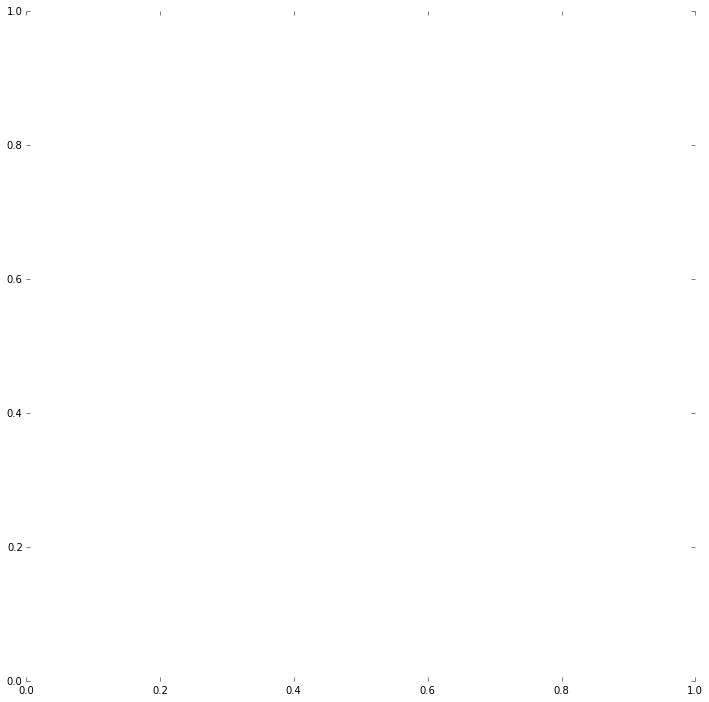

In [697]:
print preped_data.take(1) 
display( preped_data.map( lambda x: (len(x.split("|")),1) ).countByKey() )


# id, YEAR, NETWORK, LABOREXP, STAFF, ELECEXP, KWH, TOTCOST, LABOR,  ELEC,  CAPITAL
# 1,  90,  13107,     1061,    16,     163,     1631,  2536,  3709.715, 0,   41.83754
okdata = preped_data.map( lambda x: x.split("|")).filter( lambda x: len(x) == 10 )
print okdata.count(), len(hdrdata)
# set it up as a dictionary
semidata = okdata.map( lambda x: dict( zip( hdrdata, x )))
display(semidata.take(1)[0])
# set it up as a named tuple
print schema(*okdata.take(3)[1])
print

# work with spark rdd's
result = semidata.map(mapper).take(4)
print result
print
print

result = semidata.map(mapperCAPITAL).take(8)

ct = result[4]
print ct


result = semidata.map(mapper).take(40)
selectedoutcomes = {semidata: cnt for  cnt in result  }

labels = sorted(selectedoutcomes.keys())

sizes = [selectedoutcomes[key] for key in labels]

plt.figure(figsize=(12,12))
plt.pie(sizes, labels=labels  )
plt.title(ct)
None


















